In [0]:
!pip install tensorflow==1.14.0 --quiet

In [2]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np



In [5]:
df=pd.read_csv('/gdrive/My Drive/Neural Network Project/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis='columns')
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Check out the missing values

# 1. Check out the missing values 
df.isnull().sum()

# As you see below, we dont have any missing values, so we are moving forward and least bothered 
#about correcting the column values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

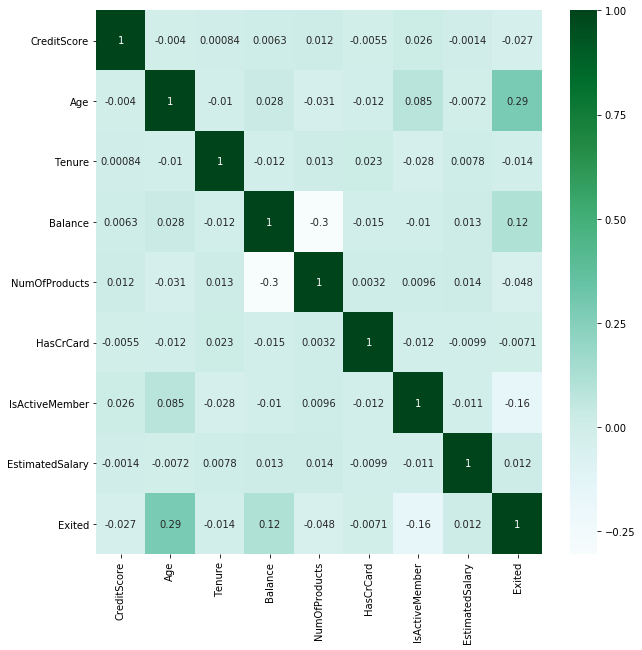

In [8]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='BuGn',annot=True)

In [0]:
x = df.drop(labels='Exited',axis=1)
y = df['Exited']

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
#deal with categorical data --> encode them

from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
x.iloc[:, 1] = labelencoder_x.fit_transform(x.iloc[:, 1]) #applying on Geography
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
#apply encoder on Gender as well
labelencoder_x_2 = LabelEncoder()
x.iloc[:, 2] = labelencoder_x_2.fit_transform(x.iloc[:, 2]) #applying on Gender
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [13]:
x.iloc[:, 1]

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [14]:

from keras.utils import to_categorical
encoded = pd.DataFrame(to_categorical(x.iloc[:, 1]))
#no need to encode Gender, as there are only two categories

x = pd.concat([encoded, x], axis = 1)
x.head()

Using TensorFlow backend.


,0,1,2,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10


In [15]:
#Dropping the existing "geography" category, and one of the onehotcoded columns.

x = x.drop(['Geography', 0], axis = 1)
x.head()

,1,2,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10


In [0]:
#train and test set split, and feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense #to add layers

#there is no rule on how many nodes each hidden layer should have
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
#init --> initialize weights according to uniform distribution
#input_dim is required for the first hidden layer, as it is the first starting point. --> number of nodes.
#output_dim --> number of nodes of the hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
#input_dim --> remove it as it already knows what to expect.

#the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
#output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
#If dependent variables have more than two categories, use activation = 'softmax'

#compile the model --> backpropagation -> gradient descent
classifier.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized. if more than two categories, use "categorical_crossentropy"
#metrics = criterion used to calculate the performance of the model.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [21]:
classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 20)
#batch_size = the number of observations after which you want to update the weights
#           batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset

Epoch 1/20
1310/8000 [===>..........................] - ETA: 0s - loss: 0.3811 - acc: 0.8397

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


8000/8000 [==============================] - 1s 115us/step - loss: 0.4035 - acc: 0.8346
Epoch 2/20
8000/8000 [==============================] - 1s 114us/step - loss: 0.4034 - acc: 0.8347
Epoch 3/20
8000/8000 [==============================] - 1s 114us/step - loss: 0.4037 - acc: 0.8341
Epoch 4/20
8000/8000 [==============================] - 1s 116us/step - loss: 0.4031 - acc: 0.8346
Epoch 5/20
8000/8000 [==============================] - 1s 114us/step - loss: 0.4028 - acc: 0.8339
Epoch 6/20
8000/8000 [==============================] - 1s 114us/step - loss: 0.4029 - acc: 0.8356
Epoch 7/20
8000/8000 [==============================] - 1s 116us/step - loss: 0.4029 - acc: 0.8354
Epoch 8/20
8000/8000 [==============================] - 1s 112us/step - loss: 0.4022 - acc: 0.8352
Epoch 9/20
8000/8000 [==============================] - 1s 113us/step - loss: 0.4020 - acc: 0.8355
Epoch 10/20
8000/8000 [==============================] - 1s 115us/step - loss: 0.4020 - acc: 0.8349
Epoch 11/20
8000/800

In [22]:

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) #to classify each probability into True or False

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print (cm, '\n\n', y_pred[:5, :])

[[1543   52]
 [ 256  149]] 

 [[False]
 [False]
 [False]
 [False]
 [False]]


In [24]:
#accuracy
print ((1543 + 149)/2000)

0.846
